<a href="https://colab.research.google.com/github/jieunlee-hi/Portfolio/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

* 시간에 따른 연속형 변수의 예측 및 Trend 파악
    - 여기서 시간은 특정 간격을 가진 주기 ; Lag
    - Lag에서 Data point의 특성을 찾는것


* 시계열 분석 모형
    - **일변량 정상시계열**
        - ARIMA
        - 지수평활법
    
    - **다변량 시계열**
        - 전이함수모형


* 시계열 패턴  
    - 추세 (Trend)
    - 계절성 (Seasonality)
    - 주기 (Cycle) :
    - 잡음 (Noise) : 시간에 따라 독립적인 데이터 / White Noise : 통계적, 기술적 분석이 가능한 정도의 Noise

**ARIMA**

* ARIMA 사용 시기 및 조건
    - 단기예측에 적합
    - 계절적 변동요인 (주기적 변동요인)
    - 표본의 크기가 최소 50개 이상
    - 정상적(Stationary)자료에 적용 가능
        - 평균이 증가/감소 -> 차분(Difference)을 실시
        - 분산이 증가/감소 -> Lag 변환
        

* AR (Auto Regressive Model) : 자기회귀모델 / p 시점 전의 자료가 현재 자료에 영향을 주는 자기회귀 모델
    - 자기상관함수 (ACF : Auto Correlation Function)
        - p 구간 내 데이터 사이의 상관관계 (교회 - 범죄 - [인구])
    - 부분자기상관함수 (PACF : Partial Auto Correlation Function) :
        - 다른 시점의 데이터들의 영향을 제외한 두 관측치 사이의 상관관계 (교회 - 범죄 !- [인구])  
    - 일반적인 AR 모델에서는 ACF는 일정히 감소 / PACF가 절단면을 갖는다
    - ACF와 PACF를 확인하여 분석 모델을 선택한다
    
* MA(Moving Average Model) : 일정한 p구간의 데이터들의 평균을 계산하여, 미래를 예측하는 방법
    - 시계열의 불규칙적인 변동을 제거하기 위함

* Difference
    - 정상성(Stationary)을 만족하지 못하는 시계열 데이터를 정상성이 만족하는 데이터로 변환


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font',family='Malgun Gothic')

In [88]:
df1=pd.read_csv('/content/sample_data/sales1.csv' , encoding='cp949')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OrderDate  2389 non-null   object
 1   Sales      2389 non-null   int64 
 2   CATE       2389 non-null   object
dtypes: int64(1), object(2)
memory usage: 56.1+ KB


In [89]:
df1.head()

,OrderDate,Sales,CATE
0,2021-01-01,9927000,a2 Platinum
1,2021-01-02,11604500,a2 Platinum
2,2021-01-03,16359350,a2 Platinum
3,2021-01-04,23554000,a2 Platinum
4,2021-01-05,19253450,a2 Platinum


In [90]:
df1.tail()

,OrderDate,Sales,CATE
2384,2024-06-24,20682640,a2 Platinum
2385,2024-06-25,10632341,a2 Milk
2386,2024-06-25,22840872,a2 Platinum
2387,2024-06-26,12254795,a2 Milk
2388,2024-06-26,18285841,a2 Platinum


In [91]:
df1['Datetime']=pd.to_datetime(df1['OrderDate'])

In [92]:
df1['Datetime'].describe()

count                             2389
mean     2022-11-01 12:05:43.574717440
min                2021-01-01 00:00:00
25%                2022-01-12 00:00:00
50%                2022-11-07 00:00:00
75%                2023-09-02 00:00:00
max                2024-06-26 00:00:00
Name: Datetime, dtype: object

In [93]:
df1['Datetime'] = pd.to_datetime(df1['OrderDate'])
df1['Year']= df1['Datetime'].dt.year
df1['Month']= df1['Datetime'].dt.month
df1['Day']= df1['Datetime'].dt.day
df1['day_of_week']= df1['Datetime'].dt.day_name()

<ipython-input-94-e783496388d5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df1, x='Datetime' ,y='Sales', ci=None)


<Axes: xlabel='Datetime', ylabel='Sales'>

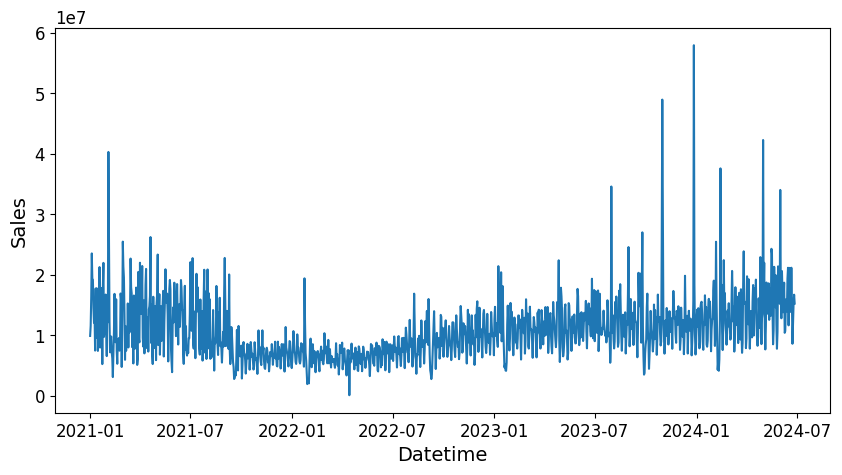

In [94]:
plt.figure(figsize= [10,5])
sns.lineplot(data=df1, x='Datetime' ,y='Sales', ci=None)

In [95]:
df1_series = pd.pivot_table(data=df1, index='Datetime', values='Sales')
df1_series.head()

,Sales
Datetime,
2021-01-01,9927000.0
2021-01-02,11604500.0
2021-01-03,16359350.0
2021-01-04,23554000.0
2021-01-05,19253450.0


In [96]:
y = df1_series['Sales'].resample('1W').mean()

In [97]:
y1 = y.fillna( y.mean() )

In [98]:
y1

Datetime
2021-01-03    1.263028e+07
2021-01-10    1.561028e+07
2021-01-17    1.252857e+07
2021-01-24    1.484065e+07
2021-01-31    1.257419e+07
                  ...     
2024-06-02    1.914634e+07
2024-06-09    1.531721e+07
2024-06-16    1.668013e+07
2024-06-23    1.521639e+07
2024-06-30    1.572910e+07
Freq: W-SUN, Name: Sales, Length: 183, dtype: float64

In [99]:
y2 = y.fillna( method='ffill' )

In [100]:
y2

Datetime
2021-01-03    1.263028e+07
2021-01-10    1.561028e+07
2021-01-17    1.252857e+07
2021-01-24    1.484065e+07
2021-01-31    1.257419e+07
                  ...     
2024-06-02    1.914634e+07
2024-06-09    1.531721e+07
2024-06-16    1.668013e+07
2024-06-23    1.521639e+07
2024-06-30    1.572910e+07
Freq: W-SUN, Name: Sales, Length: 183, dtype: float64

* 시계열 분해
 - Trend(추세요인)
 - Seasonality(계절요인)
 -Resdiual(불규칙 또는 순환요인)

In [101]:
from pylab import rcParams

In [126]:
rcParams['figure.figsize']=12,8

#차트기본크기설정
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
mpl.rcParams['text.color']='k'

## 분해 시계열
시계열에 영향을 주는 일반적 요인을 시계열에서 분리해 분석하는 방법
계절요인 Seasonal
추세요인 Trend
순환요인 Cyclical
불규칙요인 Irregular

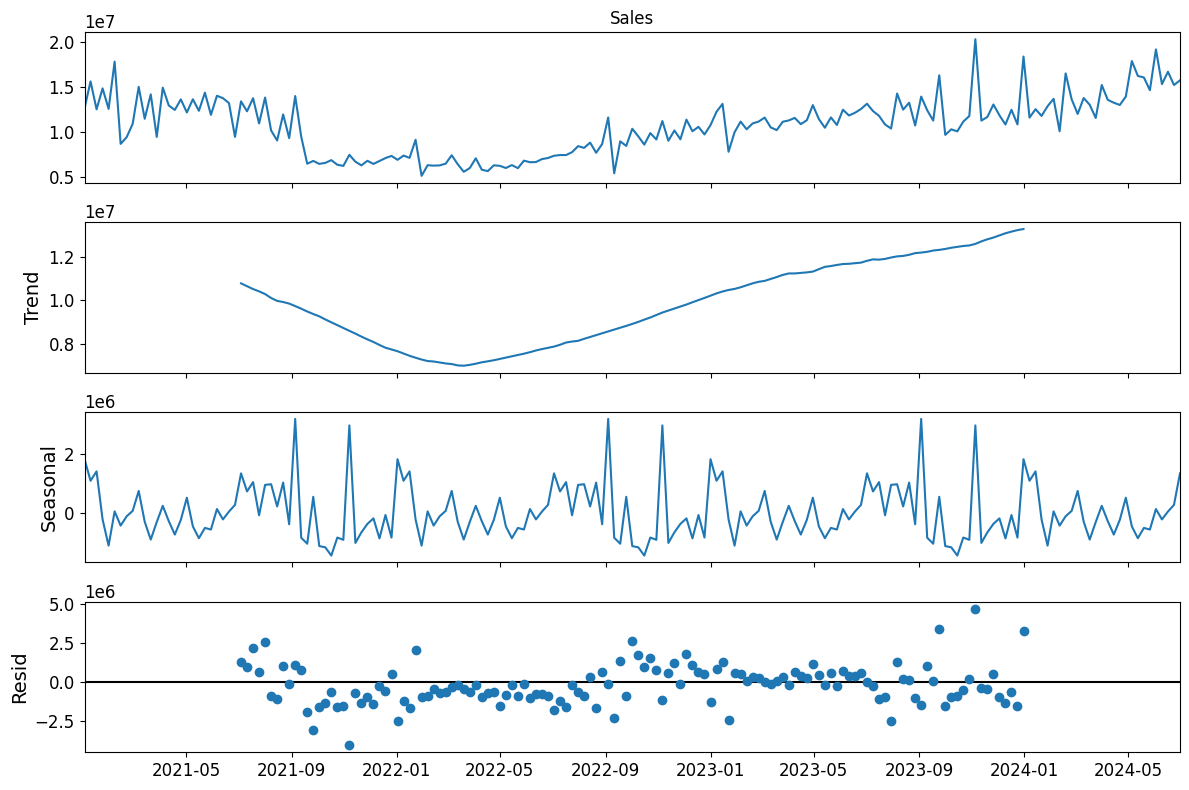

In [127]:
import statsmodels.tsa.api as tsa
model_series = tsa.seasonal_decompose(y2, model='additive')
fig=model_series.plot()
plt.show()

In [104]:
import itertools #반복수를 만드는 라이브러리

In [105]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [106]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [107]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [108]:
param_list=[]
param_seasonal_list=[]
results_AIC_list=[]

In [109]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y2,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [128]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
59,"(1, 1, 1)","(0, 1, 1, 12)",4993.285715
63,"(1, 1, 1)","(1, 1, 1, 12)",4994.841600
27,"(0, 1, 1)","(0, 1, 1, 12)",4999.367722
31,"(0, 1, 1)","(1, 1, 1, 12)",5000.554843
43,"(1, 0, 1)","(0, 1, 1, 12)",5026.675618
...,...,...,...
32,"(1, 0, 0)","(0, 0, 0, 12)",5872.452403
12,"(0, 0, 1)","(1, 0, 0, 12)",5879.416507
1,"(0, 0, 0)","(0, 0, 1, 12)",5893.354147
8,"(0, 0, 1)","(0, 0, 0, 12)",6282.236724


In [110]:
print(param_list)

[(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 1), (0, 0, 1), (0, 0, 1), (0, 0, 1), (0, 0, 1), (0, 0, 1), (0, 0, 1), (0, 0, 1), (0, 1, 0), (0, 1, 0), (0, 1, 0), (0, 1, 0), (0, 1, 0), (0, 1, 0), (0, 1, 0), (0, 1, 0), (0, 1, 1), (0, 1, 1), (0, 1, 1), (0, 1, 1), (0, 1, 1), (0, 1, 1), (0, 1, 1), (0, 1, 1), (1, 0, 0), (1, 0, 0), (1, 0, 0), (1, 0, 0), (1, 0, 0), (1, 0, 0), (1, 0, 0), (1, 0, 0), (1, 0, 1), (1, 0, 1), (1, 0, 1), (1, 0, 1), (1, 0, 1), (1, 0, 1), (1, 0, 1), (1, 0, 1), (1, 1, 0), (1, 1, 0), (1, 1, 0), (1, 1, 0), (1, 1, 0), (1, 1, 0), (1, 1, 0), (1, 1, 0), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)]


In [111]:
print(param_seasonal_list)

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12), (0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12), (0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12), (0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12), (0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12), (0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12), (0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12), (0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [112]:
print(results_AIC_list)

[6426.794252892403, 5893.354147062928, 5525.724928816839, 5133.454564488462, 5559.831526739849, 5528.528251184955, 5161.6314772010555, 5119.2497873005805, 6282.236724141272, 5838.281368470454, 5492.147073315427, 5072.573540049856, 5879.416507393331, 5812.028839713985, 5149.855250010967, 5072.466375816418, 5839.550972506144, 5425.795536946611, 5574.766757349697, 5076.952600788696, 5462.981189667609, 5426.809732874624, 5143.835130848673, 5068.8832778444685, 5703.4845575110885, 5306.589933621273, 5441.4637563348615, 4999.367722281206, 5370.872497550544, 5308.588655178435, 5084.253912099213, 5000.554842683811, 5872.452403392151, 5465.617325863815, 5520.77918835492, 5085.952051754412, 5465.519538685339, 5467.206324565453, 5103.372269017682, 5087.153964895575, 5737.717124616014, 5341.911291061033, 5470.451341016101, 5026.675618359297, 5375.132829613911, 5343.908141437772, 5082.457728196168, 5027.609709064502, 5764.805631323869, 5365.221242919588, 5492.350862732701, 5038.471167724096, 5365.22

In [113]:
ARIMA_list=pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})

In [114]:
ARIMA_list.to_excel('arima_model_list.xlsx')

# 설명

## Likelihood (최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도
- 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)
## AIC (Akaike Information Criterion) : 데이터에 대한 모델의 상대적 품질
- AIC = -2 ln(L) + 2k
 : 값이 낮을 수록 모형 적합도가 높은것을 의미
## BIC (Bayes Information Criterion)
- BIC = -2 ln(L) + log(n)p
 : 변수가 더 많은 경우, AIC에 더 많은 패널티를 부여해 계산
## HQIC (Hannan Quinn Information Criterion)
- HQIC = -2 ln(L) + 2k ln(ln(n))

In [115]:
ARIMA_list.sort_values(by='AIC').head(2)

,Parameter,Seasonal,AIC
59,"(1, 1, 1)","(0, 1, 1, 12)",4993.285715
63,"(1, 1, 1)","(1, 1, 1, 12)",4994.841600


In [129]:
mod = tsa.statespace.SARIMAX(y2,order=(1, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  183
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2492.643
Date:                            Fri, 28 Jun 2024   AIC                           4993.286
Time:                                    07:27:37   BIC                           5005.485
Sample:                                01-03-2021   HQIC                          4998.241
                                     - 06-30-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1864      0.189     -0.988      0.323      -0.556       0.183
ma.L1         -0.5738      0.151   

- Order (p,d,q), Seasonal Order (P,D,Q,M)
    - p : AR에서의 p값 (p 구간 내 데이터 사이의 상관관계)
    - d : 차분
    - q : q MA PACF 편상관계수 q 값
    - P
    - D
    - Q
    - M
    
- Ljung - Box Test : 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정
    - 귀무 : 데이터가 상관관계를 나타내지 않는다.
    - 대립 : 데이터가 상관관계를 나타낸다.
    - P.value(귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참  
    
- Jarque Bera Test : 왜도와 첨도가 정규분포와 일치하는지 가설검정
    - SARIMAX : 잔차의 분포가 정규분포 인가
    - 귀무 가설 : 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 가설 : 해당 잔차(residual)는 정규분포와 일치하지 않는다.
    - P.value < 0.05 , 해당 잔차(residual)는 정규분포와 일치하지 않는다.

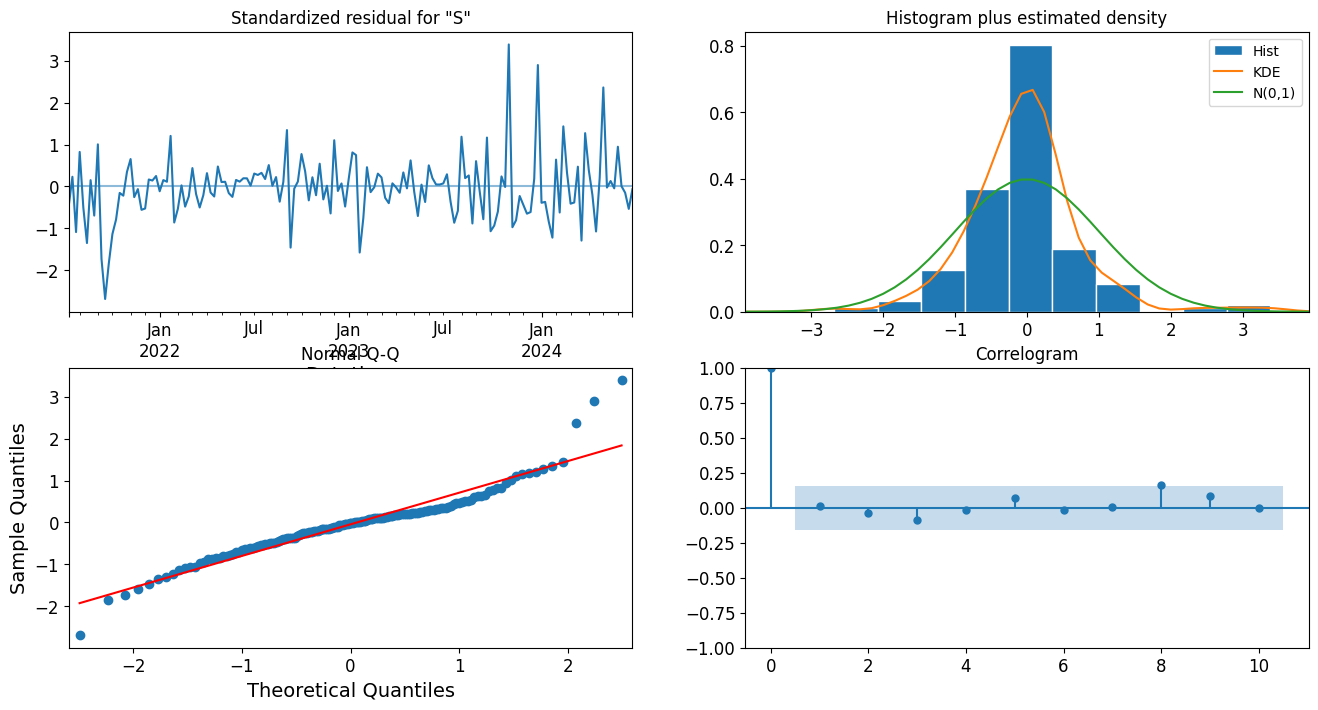

In [130]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [131]:
results.get_prediction()

In [132]:
y2.head()

Datetime
2021-01-03    1.263028e+07
2021-01-10    1.561028e+07
2021-01-17    1.252857e+07
2021-01-24    1.484065e+07
2021-01-31    1.257419e+07
Freq: W-SUN, Name: Sales, dtype: float64

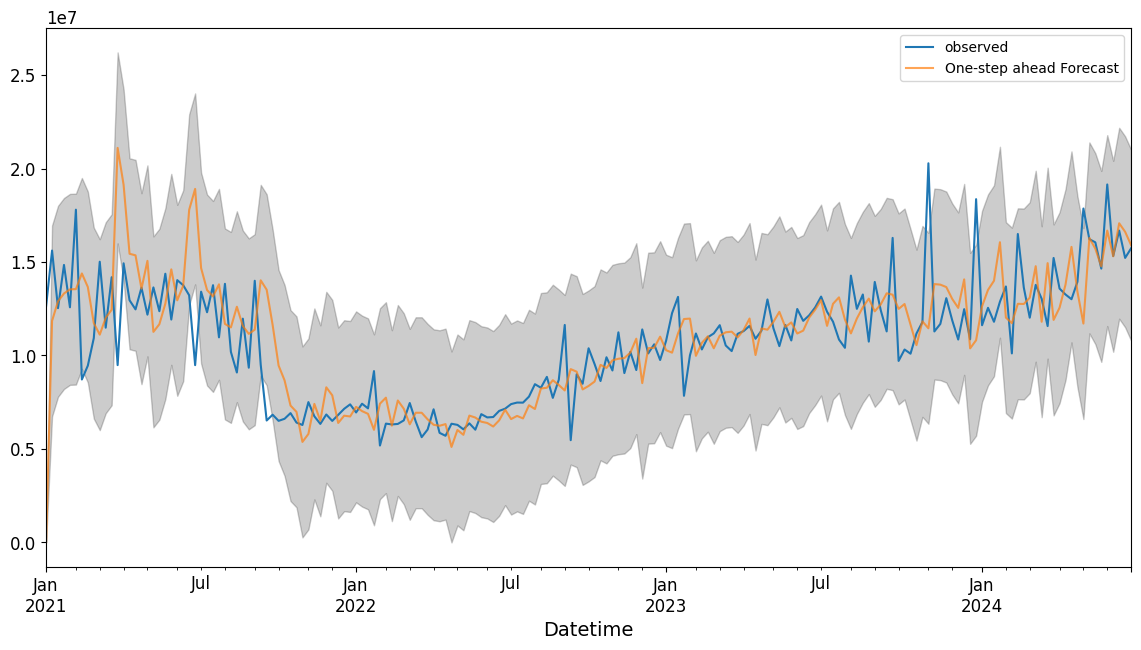

In [133]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-03'), dynamic=False)
pred_ci = pred.conf_int()

ax = y2.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [121]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-03'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,Datetime,predicted_mean
0,2021-01-03,0.000000e+00
1,2021-01-10,1.263028e+07
2,2021-01-17,1.367275e+07
3,2021-01-24,1.327249e+07
4,2021-01-31,1.382107e+07
...,...,...
178,2024-06-02,1.654622e+07
179,2024-06-09,1.551954e+07
180,2024-06-16,1.685770e+07
181,2024-06-23,1.650184e+07


In [122]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-01-03':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 6501928653747.39


In [123]:
pred_uc=results.get_forecast(steps=50)

In [124]:
pred_uc.predicted_mean


2024-07-07    1.588270e+07
2024-07-14    1.716238e+07
2024-07-21    1.642292e+07
2024-07-28    1.686401e+07
2024-08-04    1.821180e+07
2024-08-11    1.723778e+07
2024-08-18    1.617906e+07
2024-08-25    1.897878e+07
2024-09-01    1.637386e+07
2024-09-08    1.776654e+07
2024-09-15    1.705950e+07
2024-09-22    1.702366e+07
2024-09-29    1.718246e+07
2024-10-06    1.846215e+07
2024-10-13    1.772268e+07
2024-10-20    1.816377e+07
2024-10-27    1.951157e+07
2024-11-03    1.853755e+07
2024-11-10    1.747882e+07
2024-11-17    2.027855e+07
2024-11-24    1.767362e+07
2024-12-01    1.906631e+07
2024-12-08    1.835926e+07
2024-12-15    1.832343e+07
2024-12-22    1.848223e+07
2024-12-29    1.976191e+07
2025-01-05    1.902245e+07
2025-01-12    1.946354e+07
2025-01-19    2.081133e+07
2025-01-26    1.983731e+07
2025-02-02    1.877859e+07
2025-02-09    2.157832e+07
2025-02-16    1.897339e+07
2025-02-23    2.036608e+07
2025-03-02    1.965903e+07
2025-03-09    1.962320e+07
2025-03-16    1.978200e+07
2

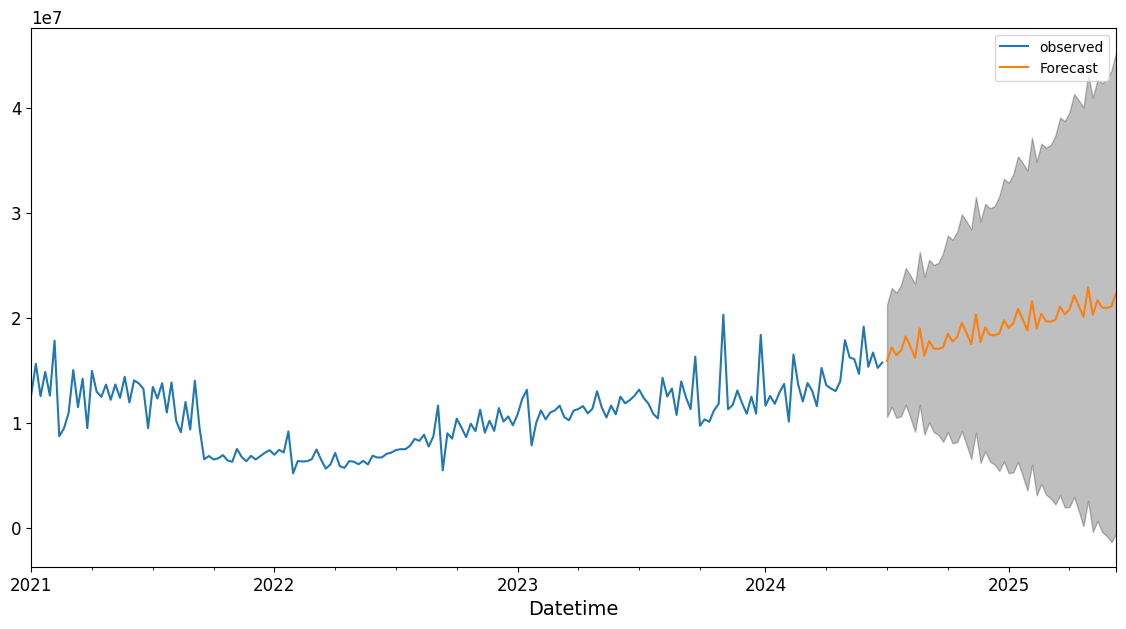

In [125]:
pred_uc=results.get_forecast(steps=50)
pred_ci=pred_uc.conf_int()
ax=y2.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color='k',alpha=.25)
plt.legend()
plt.show()